# EDA into dataset descriptions

In [1]:
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import os

# for gpu support
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

import spacy

# !python -m spacy download en_core_web_trf
activated = spacy.prefer_gpu()

# disable pandas string truncation in columns
pd.set_option('display.max_colwidth', None)

# disable pandas max rows
# pd.set_option('display.max_rows', None)

In [2]:
datasets = openml.datasets.list_datasets()

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_62097/3289773090.py:1: FutureWarning: Support for `output_format` of 'dict' will be removed in 0.15 and pandas dataframes will be returned instead. To ensure your code will continue to work, use `output_format`='dataframe'.
  datasets = openml.datasets.list_datasets()


In [3]:
openml.datasets.list_datasets()[531]

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_62097/1330030242.py:1: FutureWarning: Support for `output_format` of 'dict' will be removed in 0.15 and pandas dataframes will be returned instead. To ensure your code will continue to work, use `output_format`='dataframe'.
  openml.datasets.list_datasets()[531]


{'did': 531,
 'name': 'boston',
 'version': 1,
 'uploader': '2',
 'status': 'active',
 'format': 'ARFF',
 'MaxNominalAttDistinctValues': 9.0,
 'NumberOfClasses': 0.0,
 'NumberOfFeatures': 14.0,
 'NumberOfInstances': 506.0,
 'NumberOfInstancesWithMissingValues': 0.0,
 'NumberOfMissingValues': 0.0,
 'NumberOfNumericFeatures': 12.0,
 'NumberOfSymbolicFeatures': 2.0}

In [4]:
# dataset_ids is ordered_dict, map to variable with only ids
ids = list(datasets.keys())
print("Number of datasets: ", len(ids))

Number of datasets:  5447


In [5]:
# remove 4537, 4546, 4562, because it is not a dataset
ids.remove(4537)
ids.remove(4546)
ids.remove(4562)

In [6]:
datasets = openml.datasets.get_datasets(ids, download_data=False, download_qualities=False)
datasets[0]

/Users/ivang/miniconda3/envs/openml-tags/lib/python3.11/site-packages/openml/datasets/functions.py:447: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  get_dataset(dataset_id, download_data, download_qualities=download_qualities),


OpenML Dataset
Name.........: anneal
Version......: 1
Format.......: ARFF
Upload Date..: 2014-04-06 23:19:24
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/1666876/anneal.arff
OpenML URL...: https://www.openml.org/d/2
# of features: 39

In [7]:
# turn datasets into pandas dataframe with the columns above
df = pd.DataFrame([dataset.__dict__ for dataset in datasets])
# also add openml_url
df['openml_url'] = [dataset.openml_url for dataset in datasets]
# all datasets which have None description, make it an empty string "
df['description'] = df['description'].fillna('')
# remove datasets with identical descriptions
# df = df.drop_duplicates(subset='description')
df

ignore_attribute  dataset_id             name  version  \
0                None           2           anneal        1   
1                None           3         kr-vs-kp        1   
2                None           4            labor        1   
3                None           5       arrhythmia        1   
4                None           6           letter        1   
...               ...         ...              ...      ...   
5439             None       45929      DATASETBANK        1   
5440             None       45930  AutoDescDataset        1   
5441             None       45932              RCM        2   
5442             None       45933    HousingPrices        1   
5443             None       45934    HousingPrices        2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5444 entries, 0 to 5443
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ignore_attribute          313 non-null    object
 1   dataset_id                5444 non-null   int64 
 2   name                      5444 non-null   object
 3   version                   5444 non-null   int64 
 4   description               5444 non-null   object
 5   cache_format              5444 non-null   object
 6   format                    5444 non-null   object
 7   creator                   3187 non-null   object
 8   contributor               752 non-null    object
 9   collection_date           3495 non-null   object
 10  upload_date               5444 non-null   object
 11  language                  1820 non-null   object
 12  licence                   5444 non-null   object
 13  url                       5444 non-null   object
 14  default_target_attribute

In [9]:
# filter datasets whose description is empty string
print(len(df[df['description'] == '']), len(df[df['description'] != '']))

265 5179


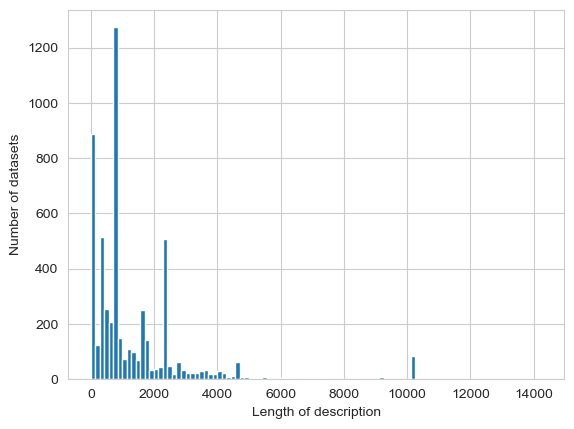

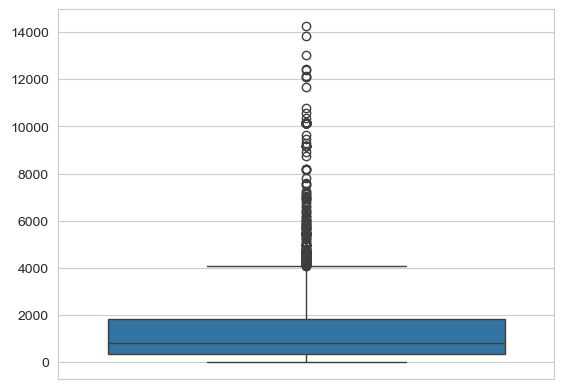

In [10]:
import matplotlib.pyplot as plt

plt.hist([len(d) for d in df['description']], bins=100, color='C0')
plt.xlabel('Length of description')
plt.ylabel('Number of datasets')
plt.show()

sns.boxplot([len(d) for d in df['description']], color='C0')
plt.show()

In [11]:
# filter out datasets with description length above 9000 for inspection
df[df['description'].map(len) > 9000]

ignore_attribute  dataset_id  \
41               None          49   
43               None          51   
139              None         204   
163              None         231   
383         [country]         528   
...               ...         ...   
5265             None       45532   
5266             None       45533   
5267             None       45534   
5268             None       45535   
5287             None       45562   

                                                         name  version  \
41                                                    heart-c        1   
43                                                    heart-h        1   
139                                               cholesterol        1   
163                                                 hungarian        1   
383                                                humandevel        1   
...                                                       ...      ...   
5265  timing-attack-dataset-35-micro-seconds-delay-2022-09-18        1   
5266  timing-attack-dataset-35-micro-seconds-delay-2022-09-19        1   
5267  timing-attack-dataset-35-micro-seconds-delay-2022-09-20        1   
5268  timing-attack-dataset-35-micro-seconds-delay-2022-09-21        1   
5287                                            seismic-bumps        3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

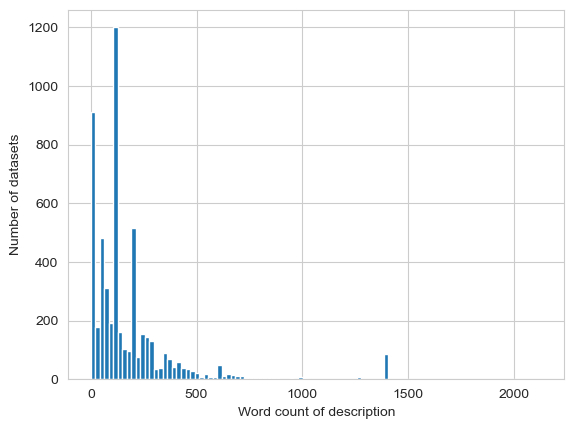

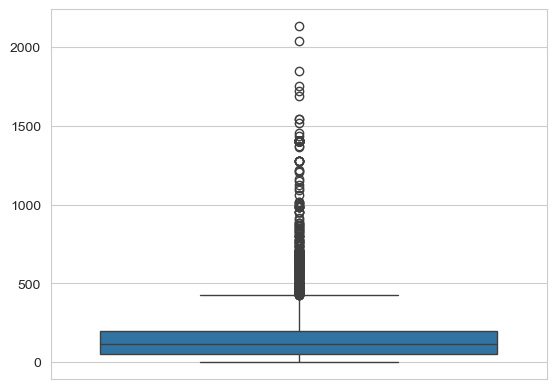

In [12]:
# Word count
plt.hist([len(d.split()) for d in df['description']], bins=100, color='C0')
plt.xlabel('Word count of description')
plt.ylabel('Number of datasets')
plt.show()

sns.boxplot([len(d.split()) for d in df['description']], color='C0')
plt.show()

[nltk_data] Downloading package punkt to /Users/ivang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


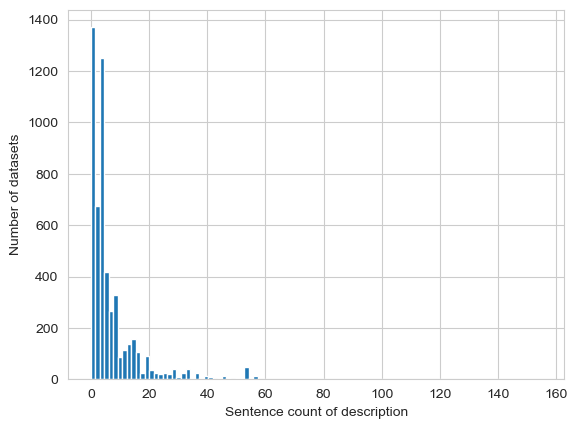

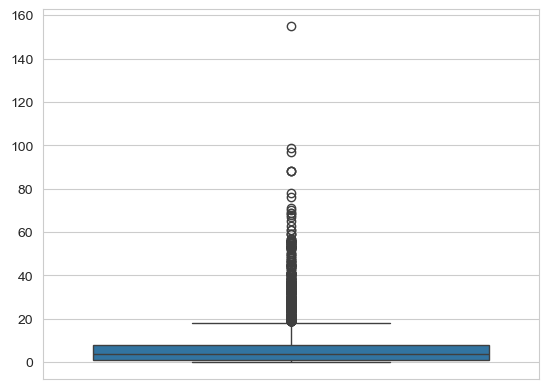

In [13]:
# Mean sentence length
import nltk
from nltk import tokenize

nltk.download('punkt')

plt.hist([len(tokenize.sent_tokenize(d)) for d in df['description']], bins=100, color='C0')
plt.xlabel('Sentence count of description')
plt.ylabel('Number of datasets')
plt.show()

sns.boxplot([len(tokenize.sent_tokenize(d)) for d in df['description']], color='C0')
plt.show()

In [14]:
nlp = spacy.load("en_core_web_trf")

def mean_word_length(description):
    doc = nlp(description)
    words = [token.text for token in doc if not token.is_punct and not token.is_space]
    if words:  # Check if there are words to avoid ZeroDivisionError
        return sum(len(word) for word in words) / len(words)
    else:
        return 0


mean_word_lengths = df['description'].apply(mean_word_length)

Average word length in English texts is 5.1 characters

In [15]:
print("Mean word lengths mean and median: ", mean_word_lengths.mean(), mean_word_lengths.median())

Mean word lengths mean and median:  7.196690777372053 5.556521739130435


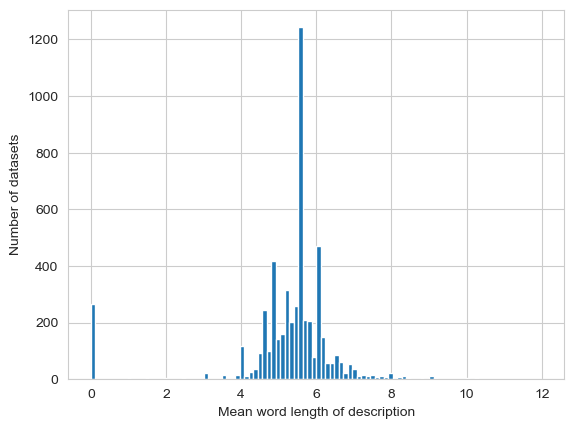

In [16]:
plt.hist(mean_word_lengths, bins=100, color='C0', range=(0, 12))
plt.xlabel('Mean word length of description')
plt.ylabel('Number of datasets')
plt.show()

In [17]:
def longest_word(description):
    doc = nlp(description)
    words = [token.text for token in doc if not token.is_punct and not token.is_space]
    if words:  # Check if there are words to avoid ZeroDivisionError
        return max(words, key=len)
    else:
        return None


longest_words = df['description'].apply(longest_word)

longest_words.value_counts().head(10)

description
MOLECULE_CHEMBL_ID                                                 1083
list(x.columns[sorted_column_idxs                                   436
classifying                                                         231
https://www.dukascopy.com/swiss/english/marketwatch/historical/     192
https://github.com/LeoGrin/tabular-benchmark                        150
Acknowledgements                                                    116
Correctly_formatted_PKCS#1_PMS_message__but_1_byte_shorter           87
test                                                                 85
classification                                                       83
fri_colinearintydegree_samplenumber_featurenumber                    80
Name: count, dtype: int64

In [18]:
# term frequency analysis
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')


def clean(text, remove_stopwords=True, remove_numbers=True):
    text = text.lower()
    # remove non-alphabetic characters
    text = re.sub('[^a-z A-Z 0-9-]+', '', text)
    # remove stopwords
    if remove_stopwords:
        text = ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english')])
    # remove numbers too
    if remove_numbers:
        text = re.sub(r'\d+', '', text)

    return text

[nltk_data] Downloading package stopwords to /Users/ivang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from collections import Counter

mostCommon = Counter(word_tokenize(" ".join(df['description'].map(clean)))).most_common(15)
words = [word[0] for word in mostCommon]
frequency = [word[1] for word in mostCommon]

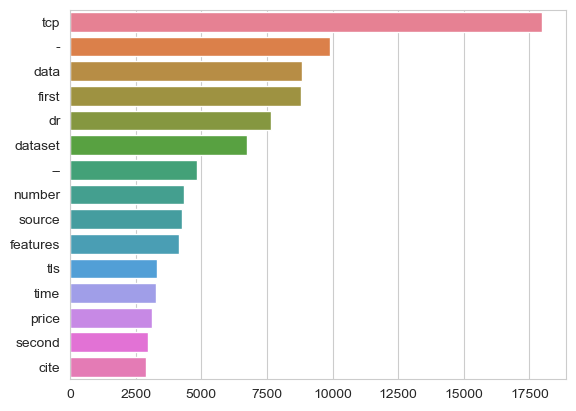

In [20]:
sns.barplot(x=frequency, y=words, hue=words)
plt.show()

# Topics bar chart
![Topics Bar Chart](latex/proposal/images/topics_barchart.png)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
bigrams = cv.fit_transform(df['description'].map(clean))

count_values = bigrams.toarray().sum(axis=0)
bigram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
bigram_freq.columns = ["frequency", "bigram"]

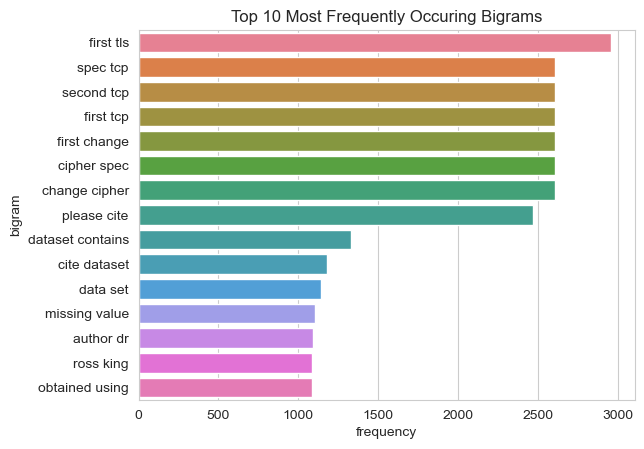

In [22]:
sns.barplot(x=bigram_freq['frequency'][:15], y=bigram_freq['bigram'][:15], hue=bigram_freq['bigram'][:15])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [23]:
# Show sets that contain tcp
df[df['description'].map(lambda x: 'tcp' in x)].head(50)

ignore_attribute  dataset_id  \
941              None        1110   
944              None        1113   
3233             None       42746   
5182             None       45449   
5183             None       45450   
5184             None       45451   
5185             None       45452   
5186             None       45453   
5187             None       45454   
5188             None       45455   
5189             None       45456   
5190             None       45457   
5191             None       45458   
5192             None       45459   
5193             None       45460   
5194             None       45461   
5195             None       45462   
5196             None       45463   
5197             None       45464   
5198             None       45465   
5199             None       45466   
5200             None       45467   
5201             None       45468   
5202             None       45469   
5203             None       45470   
5204             None       45471   
5205             None       45472   
5206             None       45473   
5207             None       45474   
5208             None       45475   
5209             None       45476   
5210             None       45477   
5211             None       45478   
5212             None       45479   
5213             None       45480   
5214             None       45481   
5215             None       45482   
5216             None       45483   
5217             None       45484   
5218             None       45485   
5219             None       45486   
5220             None       45487   
5221             None       45488   
5222             None       45489   
5223             None       45490   
5224             None       45491   
5225             None       45492   
5226             None       45493   
5227             None       45494   
5228             None       45495   

                                                          name  version  \
941                                              KDDCup99_full        1   
944                                                   KDDCup99        1   
3233                                                  KDDCup99        5   
5182    timing-attack-dataset-1-micro-seconds-delay-2022-09-01        1   
5183    timing-attack-dataset-1-micro-seconds-delay-2022-09-12        1   
5184    timing-attack-dataset-1-micro-seconds-delay-2022-09-17        1   
5185    timing-attack-dataset-2-micro-seconds-delay-2022-09-01        1   
5186    timing-attack-dataset-2-micro-seconds-delay-2022-09-12        1   
5187    timing-attack-dataset-2-micro-seconds-delay-2022-09-17        1   
5188    timing-attack-dataset-4-micro-seconds-delay-2022-09-01        1   
5189    timing-attack-dataset-4-micro-seconds-delay-2022-09-12        1   
5190    timing-attack-dataset-4-micro-seconds-delay-2022-09-17        1   
5191    timing-attack-dataset-8-micro-seconds-delay-2022-09-01        1   
5192    timing-attack-dataset-8-micro-seconds-delay-2022-09-12        1   
5193    timing-attack-dataset-8-micro-seconds-delay-2022-09-17        1   
5194   timing-attack-dataset-16-micro-seconds-delay-2022-09-01        1   
5195   timing-attack-dataset-16-micro-seconds-delay-2022-09-12        1   
5196   timing-attack-dataset-16-micro-seconds-delay-2022-09-17        1   
5197   timing-attack-dataset-32-micro-seconds-delay-2022-09-01        1   
5198   timing-attack-dataset-32-micro-seconds-delay-2022-09-12        1   
5199   timing-attack-dataset-32-micro-seconds-delay-2022-09-17        1   
5200   timing-attack-dataset-64-micro-seconds-delay-2022-09-01        1   
5201   timing-attack-dataset-64-micro-seconds-delay-2022-09-12        1   
5202   timing-attack-dataset-64-micro-seconds-delay-2022-09-17        1   
5203  timing-attack-dataset-128-micro-seconds-delay-2022-09-01        1   
5204  timing-attack-dataset-128-micro-seconds-delay-2022-09-12        1   
5205  timing-attack-dataset-128-micro-seconds-delay-2022-09-17        1   
5206  timing-atta

In [24]:
# do same for trigrams
cv = CountVectorizer(ngram_range=(3, 3))
trigrams = cv.fit_transform(df['description'].map(clean))

count_values = trigrams.toarray().sum(axis=0)
trigram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
trigram_freq.columns = ["frequency", "trigram"]
trigram_freq

frequency                        trigram
0            2610            first change cipher
1            2610                cipher spec tcp
2            2610             change cipher spec
3            1174            please cite dataset
4            1093          cite dataset contains
...           ...                            ...
142920          1  aa clusteringcoefficient real
142921          1             aa bbsolving findb
142922          1                      aa bbb bb
142923          1             aa analyst already
142924          1    aa amsterdamthe netherlands

[142925 rows x 2 columns]

# EDA into dataset original_data_url

In [25]:
len(df[df['original_data_url'].notnull()])

2440

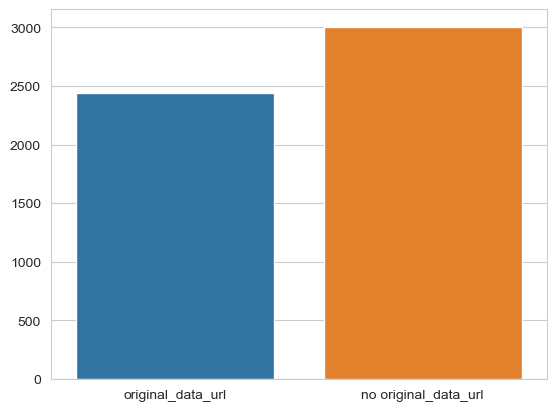

In [26]:
import matplotlib.pyplot as plt

sns.barplot(x=['original_data_url', 'no original_data_url'],
            y=[len(df[df['original_data_url'].notnull()]), len(df[df['original_data_url'].isnull()])],
            hue=['original_data_url', 'no original_data_url'])
plt.show()

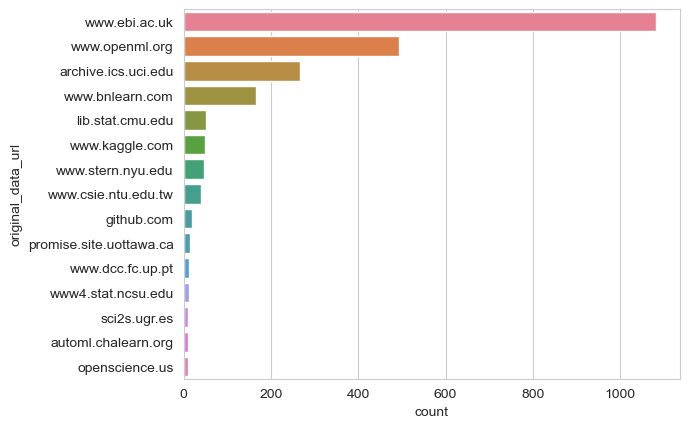

In [27]:
# get the domain of http://www.cs.waikato.ac.nz/ml/weka/datasets.html, using a library, not split
from urllib.parse import urlparse

domains = (df['original_data_url'].dropna().map(lambda x: urlparse(x).netloc))

# plot a barplot of the top k domains
k = 15
sns.barplot(x=domains.value_counts().head(k), y=domains.value_counts().head(k).index,
            hue=domains.value_counts().head(k).index)
plt.show()

In [28]:
# filter the datasets from ebi.ac.uk for original_data_url
df[df['original_data_url'].map(lambda x: 'ebi.ac.uk' in x if x else False)][
    ['name', 'original_data_url', 'openml_url']]

name                                       original_data_url  \
1277   QSAR-TID-12276  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL3956   
1278   QSAR-TID-12475  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL3848   
1279   QSAR-TID-12886  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL2731   
1280   QSAR-TID-10113  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL2978   
1281   QSAR-TID-12514   https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL319   
...               ...                                                     ...   
2354   QSAR-TID-30004  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL3938   
2355   QSAR-TID-10803  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL3187   
2356   QSAR-TID-12327  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL3295   
2357   QSAR-TID-10962  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL2460   
2358  QSAR-TID-101276  https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL5657   

                         openml_url  
1277  https://www.openml.org/d/3040  
1278  https://www.openml.org/d/3041  
1279  https://www.openml.org/d/3042  
1280  https://www.openml.org/d/3043  
1281  https://www.openml.org/d/3044  
...                             ...  
2354  https://www.openml.org/d/4127  
2355  https://www.openml.org/d/4128  
2356  https://www.openml.org/d/4129  
2357  https://www.openml.org/d/4130  
2358  https://www.openml.org/d/4131  

[1082 rows x 3 columns]

In [29]:
# filter the datasets from openml.org for original_data_url
df[df['original_data_url'].map(lambda x: 'lib.stat.cmu' in x if x else False)][['name', 'original_data_url', 'openml_url']]

name                          original_data_url  \
313                      irish  http://lib.stat.cmu.edu/datasets/irish.ed   
332                      profb     http://lib.stat.cmu.edu/datasets/profb   
347                    papir_2          http://lib.stat.cmu.edu/datasets/   
348              colleges_aaup          http://lib.stat.cmu.edu/datasets/   
351                newton_hema          http://lib.stat.cmu.edu/datasets/   
365                    nflpass          http://lib.stat.cmu.edu/datasets/   
371              baseball-team          http://lib.stat.cmu.edu/datasets/   
377                       pm10          http://lib.stat.cmu.edu/datasets/   
392                     houses          http://lib.stat.cmu.edu/datasets/   
402                        no2          http://lib.stat.cmu.edu/datasets/   
403                    strikes          http://lib.stat.cmu.edu/datasets/   
406                    detroit          http://lib.stat.cmu.edu/datasets/   
407                     kidney          http://lib.stat.cmu.edu/datasets/   
521            chscase_census5          http://lib.stat.cmu.edu/datasets/   
522            chscase_census4          http://lib.stat.cmu.edu/datasets/   
523            chscase_census3          http://lib.stat.cmu.edu/datasets/   
524            chscase_census2          http://lib.stat.cmu.edu/datasets/   
525             chscase_demand          http://lib.stat.cmu.edu/datasets/   
526          visualizing_slope          http://lib.stat.cmu.edu/datasets/   
527      disclosure_x_tampered          http://lib.stat.cmu.edu/datasets/   
528  visualizing_environmental          http://lib.stat.cmu.edu/datasets/   
529           rmftsa_sleepdata          http://lib.stat.cmu.edu/datasets/   
530              chscase_funds          http://lib.stat.cmu.edu/datasets/   
531             hutsof99_logis          http://lib.stat.cmu.edu/datasets/   
532              sleuth_ex2016          http://lib.stat.cmu.edu/datasets/   
533              sleuth_ex2015          http://lib.stat.cmu.edu/datasets/   
534                   rabe_166          http://lib.stat.cmu.edu/datasets/   
535      visualizing_livestock          http://lib.stat.cmu.edu/datasets/   
536         rmftsa_ctoarrivals          http://lib.stat.cmu.edu/datasets/   
537              sleuth_ex1605          http://lib.stat.cmu.edu/datasets/   
538           visualizing_soil          http://lib.stat.cmu.edu/datasets/   
539              chscase_vine2          http://lib.stat.cmu.edu/datasets/   
540         visualizing_galaxy          http://lib.stat.cmu.edu/datasets/   
541              chscase_vine1          http://lib.stat.cmu.edu/datasets/   
542                   rabe_131          http://lib.stat.cmu.edu/datasets/   
543            diggle_table_a1          http://lib.stat.cmu.edu/datasets/   
544            diggle_table_a2          http://lib.stat.cmu.edu/datasets/   
546     hutsof99_child_witness          http://lib.stat.cmu.edu/datasets/   
547                    rabe_97          http://lib.stat.cmu.edu/datasets/   
548                   rabe_176          http://lib.stat.cmu.edu/datasets/   
549               disclosure_z          http://lib.stat.cmu.edu/datasets/   
551              sleuth_ex1221          http://lib.stat.cmu.edu/datasets/   
552               chscase_foot          http://lib.stat.cmu.edu/datasets/   
553         disclosure_x_noise          http://lib.stat.cmu.edu/datasets/   
554             chscase_health          http://lib.stat.cmu.edu/datasets/   
555            sleuth_case1202          http://lib.stat.cmu.edu/datasets/   
556            sleuth_case1201          http://lib.stat.cmu.edu/datasets/   
557        visualizing_hamster          http://lib.stat.cmu.edu/datasets/   
558          disclosure_x_bias          http://lib.stat.cmu.edu/datasets/   
559                   rabe_148          http://lib.stat.cmu.edu/datasets/   
560        visualizing_ethanol          http://lib.stat.cmu.edu/datasets/   
561            chscase

In [30]:
df[df['original_data_url'].map(lambda x: 'github' in x if x else False)][['name', 'original_data_url', 'openml_url']]


name  \
2509                 Fashion-MNIST   
2560                  freMTPL2freq   
2567                  okcupid-stem   
2845                MultilingualDS   
2878               Kuzushiji-MNIST   
2884                  Kuzushiji-49   
2947             article_influence   
2962                dating_profile   
3101                Midwest_Survey   
3102        Midwest_Survey_nominal   
3131                      penguins   
3190            ricci_vs_destefano   
3228                  okcupid-stem   
3242                Midwest_survey   
3256                Midwest_survey   
3257                Midwest_survey   
3450             ACSPublicCoverage   
3451             ACSPublicCoverage   
3452                     ACSIncome   
3455  StackOverflow-polarity-train   
3456   StackOverflow-polarity-test   
3457        StackOverflow-polarity   
3463        StackOverflow-polarity   
5010            MTPL_SHAP_Tutorial   
5180                     AfriSenti   

                                                                                                 original_data_url  \
2509                                                              https://github.com/zalandoresearch/fashion-mnist   
2560                                                                        https://github.com/dutangc/CASdatasets   
2567                                       https://github.com/rudeboybert/JSE_OkCupid/blob/master/profiles.csv.zip   
2845  https://github.com/valeriano-manassero/multilingual-text-categorization-dataset/blob/master/data/dataset.csv   
2878                                                                           https://github.com/rois-codh/kmnist   
2884                                                                           https://github.com/rois-codh/kmnist   
2947                     https://github.com/FlourishOA/Data/raw/master/estimated-article-influence-scores-2015.csv   
2962                                        https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles.csv.zip   
3101                                             https://github.com/fivethirtyeight/data/tree/master/region-survey   
3102                                             https://github.com/fivethirtyeight/data/tree/master/region-survey   
3131                                                                https://github.com/allisonhorst/palmerpenguins   
3190                   https://github.com/algofairness/fairness-comparison/blob/master/fairness/data/raw/ricci.txt   
3228                                       https://github.com/rudeboybert/JSE_OkCupid/blob/master/profiles.csv.zip   
3242                       https://raw.githubusercontent.com/fivethirtyeight/data/master/region-survey/MIDWEST.csv   
3256                       https://raw.githubusercontent.com/fivethirtyeight/data/master/region-survey/MIDWEST.csv   
3257                       https://raw.githubusercontent.com/fivethirtyeight/data/master/region-survey/MIDWEST.csv   
3450                                     https://arxiv.org/pdf/2108.04884.pdf, https://github.com/zykls/folktables   
3451                                     https://arxiv.org/pdf/2108.04884.pdf, https://github.com/zykls/folktables   
3452                                                                          https://github.com/zykls/folktables/   
3455                                         https://github.com/collab-uniba/EMTK_datasets/tree/master/so/polarity   
3456                                         https://github.com/collab-uniba/EMTK_datasets/tree/master/so/polarity   
3457                                         https://github.com/collab-uniba/EMTK_datasets/tree/master/so/polarity   
3463                                         https://github.com/collab-uniba/EMTK_datasets/tree/master/so/polarity   
5010                                                         https://github.com/JSchelldorfer/ActuarialDataScience   
5180                                                    https://github.com/afrisenti-semeva

# Brief exploration with LDA using pyLDAvis

In [31]:
import nltk

nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


def preprocess(df):
    corpus = []
    lem = WordNetLemmatizer()
    for description in df['description']:
        description = description.lower()
        words = [w for w in word_tokenize(description) if (w not in stopwords.words('english'))]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]

        corpus.append(words)

    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    return corpus, dic, bow_corpus


corpus, dic, bow_corpus = preprocess(df)
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=50,
                                       id2word=dic,
                                       passes=10,
                                       workers=2)

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

[nltk_data] Downloading package wordnet to /Users/ivang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ivang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.024311 -0.380633       1        1  15.675172
22    -0.140350 -0.164395       2        1  12.981623
46    -0.098656 -0.234897       3        1   9.247166
38    -0.101518 -0.037730       4        1   5.192874
9     -0.149824  0.015525       5        1   4.088213
13    -0.047984 -0.016258       6        1   3.431662
11    -0.186525 -0.111971       7        1   2.577843
8     -0.084017  0.051381       8        1   2.577694
44    -0.062657 -0.008877       9        1   2.281547
1     -0.034238  0.069388      10        1   2.274269
19    -0.063055  0.096043      11        1   2.248699
43    -0.043385  0.089639      12        1   2.067091
31    -0.029101  0.103668      13        1   1.907112
18    -0.078699  0.041400      14        1   1.746806
16    -0.034378 -0.132772      15        1   1.708029
6     -0.006939  0.057694      16        1   1.618073
12    -0.089594  0.045316      17        1   1.566987
10    -0.079695  0.095901      18        1   1.530291
26    -0.054981  0.061526      19        1   1.511164
2     -0.151910 -0.107082      20        1   1.507279
45     0.024676  0.065484      21        1   1.433012
36    -0.157975  0.050510      22        1   1.331354
15     0.013144  0.065764      23        1   1.329136
29    -0.053544  0.082771      24        1   1.310558
41    -0.023300  0.087718      25        1   1.297340
32    -0.023203  0.079815      26        1   1.183363
7     -0.055294  0.069854      27        1   1.125496
24    -0.087887  0.048770      28        1   1.091731
48    -0.049845  0.059937      29        1   1.057852
49    -0.013401  0.029066      30        1   0.985332
27    -0.115806 -0.110428      31        1   0.961068
17    -0.095384  0.058817      32        1   0.861531
39     0.008604 -0.059093      33        1   0.777599
40    -0.046777  0.021892      34        1   0.757088
23     0.020870  0.082344      35        1   0.741853
34     0.033541 -0.001450      36        1   0.738987
33     0.083667  0.053653      37        1   0.726585
42    -0.000321  0.084204      38        1   0.685697
28     0.073118 -0.263174      39        1   0.673313
14     0.039256  0.001888      40        1   0.532314
35     0.142580 -0.006943      41        1   0.511045
0      0.159172 -0.016946      42        1   0.487036
47     0.110620  0.025017      43        1   0.451011
37     0.115073  0.064672      44        1   0.442061
20     0.114169  0.059784      45        1   0.273144
4      0.276846 -0.019814      46        1   0.120065
25     0.208928 -0.067033      47        1   0.119751
30     0.295319 -0.036155      48        1   0.088912
3      0.300827 -0.014395      49        1   0.083552
21     0.264142 -0.029398      50        1   0.082618, topic_info=          Term          Freq         Total Category  logprob  loglift
12359      tcp  17936.000000  17936.000000  Default  30.0000  30.0000
10643     ....   7322.000000   7322.000000  Default  29.0000  29.0000
30667     tls0   3264.000000   3264.000000  Default  28.0000  28.0000
30625    disc1   2933.000000   2933.000000  Default  27.0000  27.0000
30624    disc0   2932.000000   2932.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
311      white      1.688048     73.972206  Topic50  -5.7981   3.3186
6968      2002      1.410936     19.164674  Topic50  -5.9774   4.4899
59     dataset      2.212778   7609.068279  Topic50  -5.5274  -1.0442
74        http      1.650955   4356.446086  Topic50  -5.8203  -0.7794
226       list      1.419895   1887.587479  Topic50  -5.9711  -0.0938

[3233 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
16517     25  0.977355      'accurate
19808     32  0.923202  'dolocationid
19809     32  0.923203   'fare_amount
2840      46  0.769422           'fti
14895     43  0.907282            'if
...  

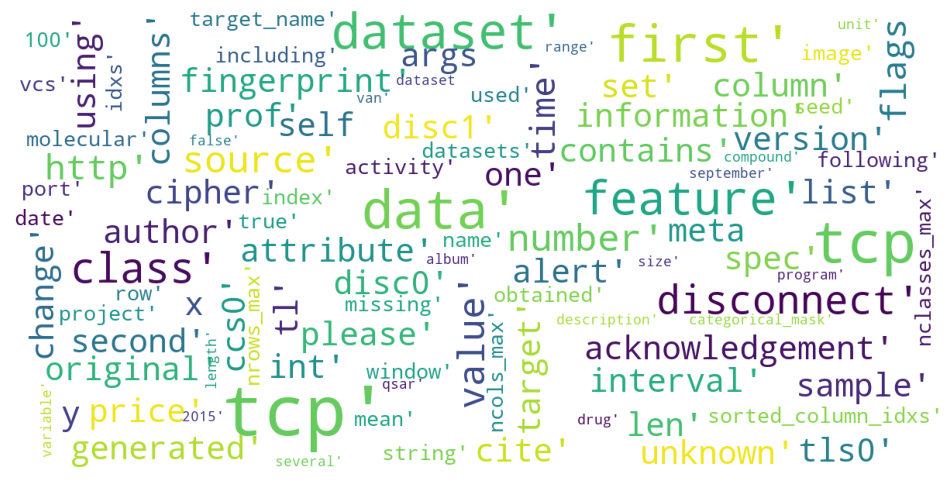

In [32]:
from wordcloud import WordCloud, STOPWORDS


def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        scale=3,
        collocations=False,
        random_state=1)

    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(corpus)

# Named Entity Recognition (NER) with spaCy

In [33]:
nlp = spacy.load("en_core_web_trf")

ner = nlp.get_pipe("ner")

# List the available entity types
entity_labels = ner.labels

print(entity_labels)

# Description for each entity type
for entity in entity_labels:
    print(f"{entity}: {spacy.explain(entity)}")

('CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART')
CARDINAL: Numerals that do not fall under another type
DATE: Absolute or relative dates or periods
EVENT: Named hurricanes, battles, wars, sports events, etc.
FAC: Buildings, airports, highways, bridges, etc.
GPE: Countries, cities, states
LANGUAGE: Any named language
LAW: Named documents made into laws.
LOC: Non-GPE locations, mountain ranges, bodies of water
MONEY: Monetary values, including unit
NORP: Nationalities or religious or political groups
ORDINAL: "first", "second", etc.
ORG: Companies, agencies, institutions, etc.
PERCENT: Percentage, including "%"
PERSON: People, including fictional
PRODUCT: Objects, vehicles, foods, etc. (not services)
QUANTITY: Measurements, as of weight or distance
TIME: Times smaller than a day
WORK_OF_ART: Titles of books, songs, etc.


# Visualize the entities in the description as example

In [34]:
from spacy import displacy

doc = nlp(df['description'][500])

print(doc.ents)
# visualize the entities
displacy.render(doc, style="ent")

(Friedman, 80, J.H. Friedman, 1999, Friedman, Friedman, 1999, Friedman, Friedman, Friedman, 5, 5, Friedman, 5 10 25 50 100, first, 5, 100 250 500, 4, 10, 25, 50, 100, 5, 10, 25, 50, 80, 4, 4, 5)


/Users/ivang/miniconda3/envs/openml-tags/lib/python3.11/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [35]:
from tqdm import tqdm

docs = [nlp(description) for description in tqdm(df['description'])]

counter = Counter([X.label_ for doc in docs for X in doc.ents])
count = counter.most_common()
count

100%|██████████| 5444/5444 [04:17<00:00, 21.14it/s] 


[('CARDINAL', 25947),
 ('PERSON', 23672),
 ('ORDINAL', 11755),
 ('ORG', 10928),
 ('DATE', 8472),
 ('GPE', 2902),
 ('PRODUCT', 2136),
 ('TIME', 1231),
 ('WORK_OF_ART', 706),
 ('PERCENT', 682),
 ('QUANTITY', 490),
 ('NORP', 463),
 ('LOC', 394),
 ('EVENT', 307),
 ('MONEY', 145),
 ('LANGUAGE', 126),
 ('FAC', 118),
 ('LAW', 52)]

In [36]:
import plotly.express as px

# Reverse the order for Plotly to display it with the largest bar on top
count_reversed = count[::-1]

# Create lists of labels and values from the reversed count
labels, values = zip(*count_reversed)

# Generate explanations for each label in the correct order
explanations = [spacy.explain(label) for label in labels]

fig = px.bar(x=values, y=labels, orientation='h', labels={'x': 'Count', 'y': 'Entity'},
             hover_data={'Entity': labels, 'Count': values, 'Description': explanations})

fig.update_traces(hovertemplate='<b>Entity:</b> %{y}<br><b>Count:</b> %{x}<br><b>Description:</b> %{customdata[2]}')

fig.show()

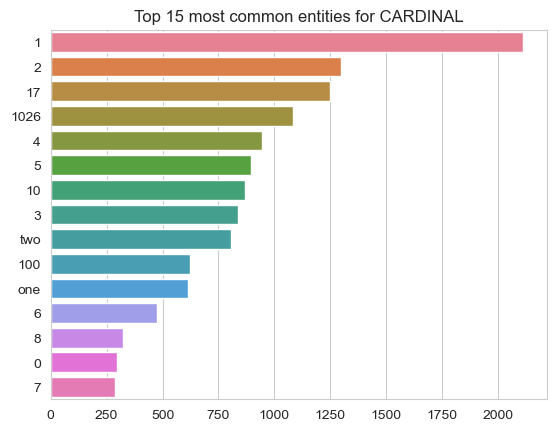

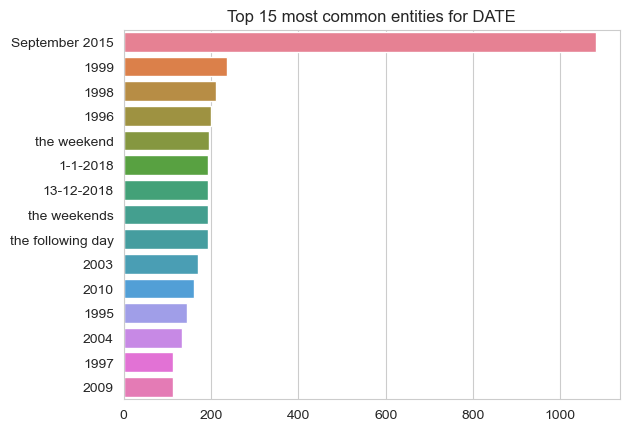

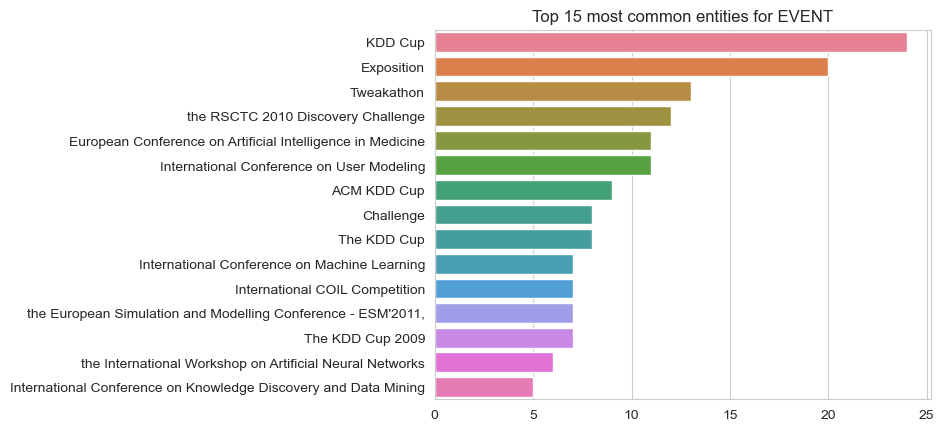

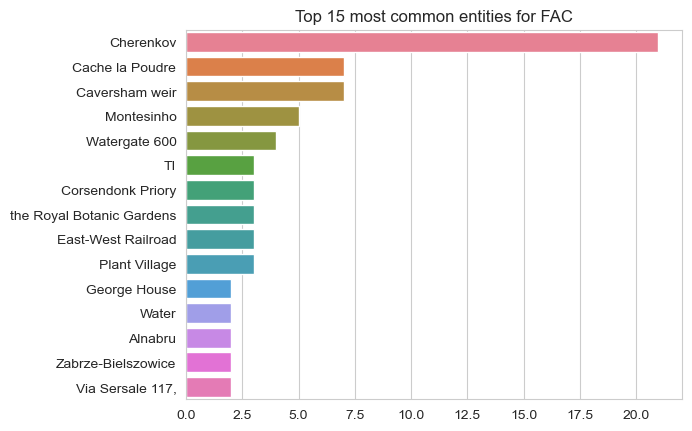

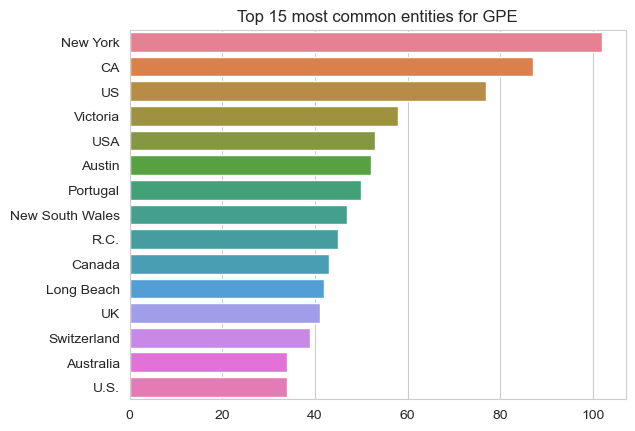

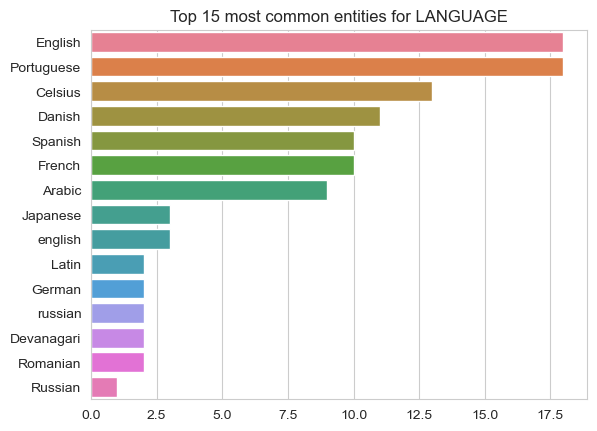

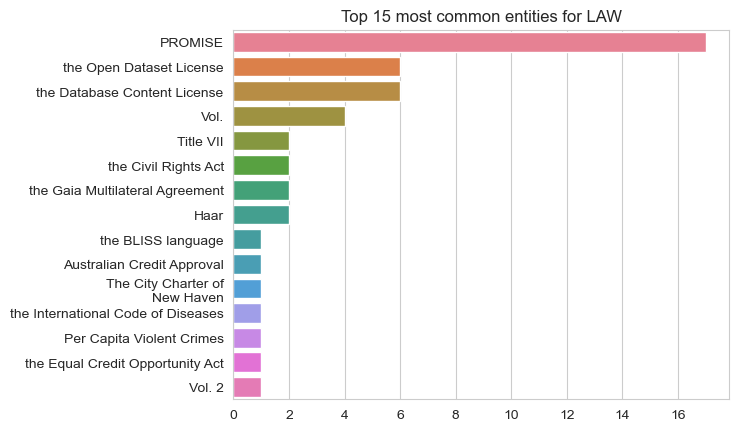

/Users/ivang/miniconda3/envs/openml-tags/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



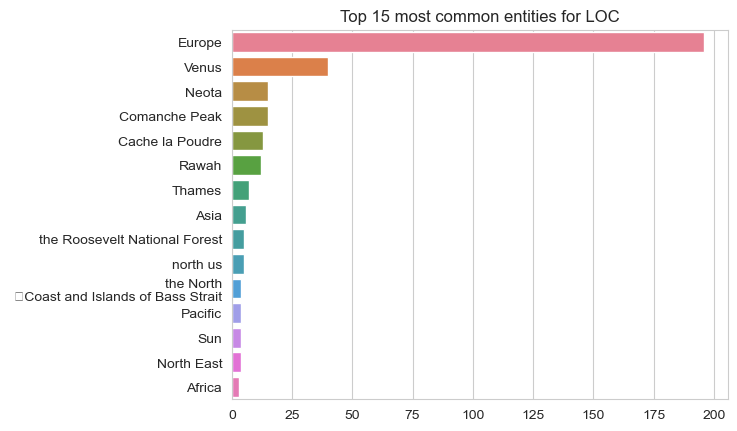

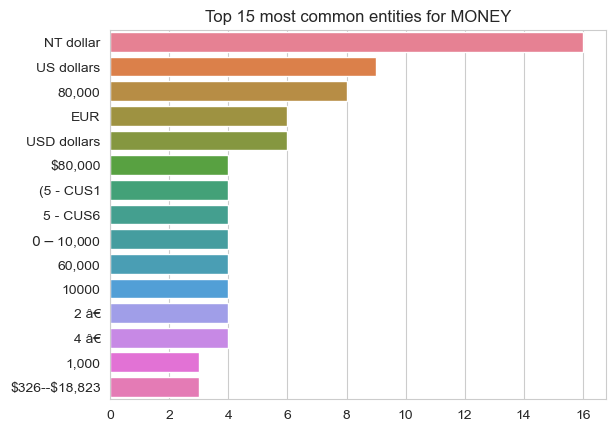

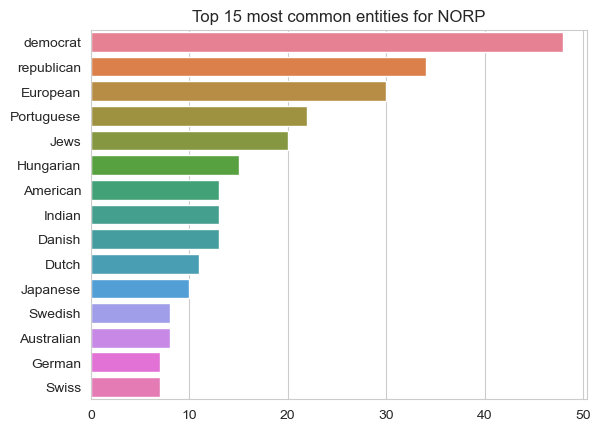

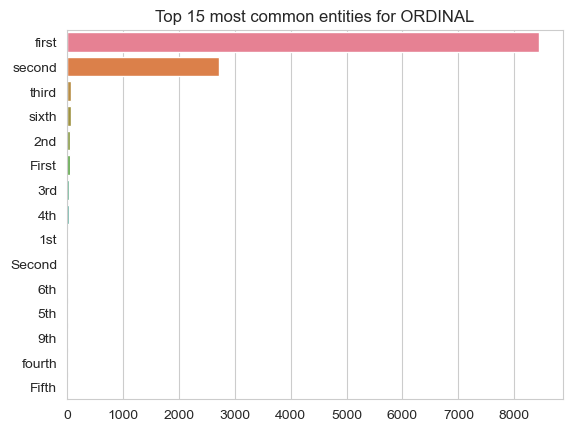

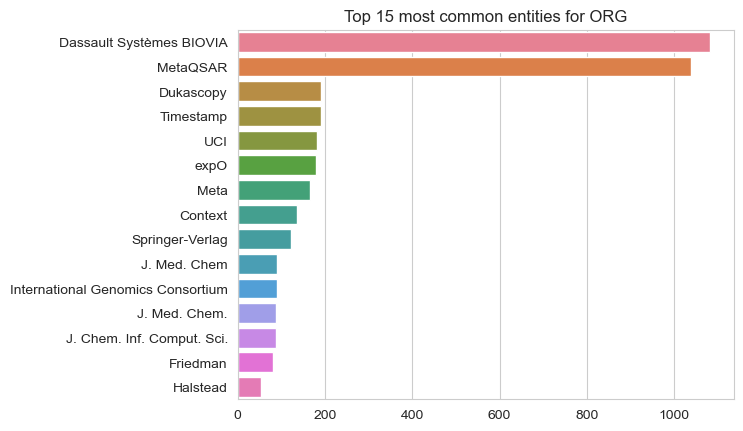

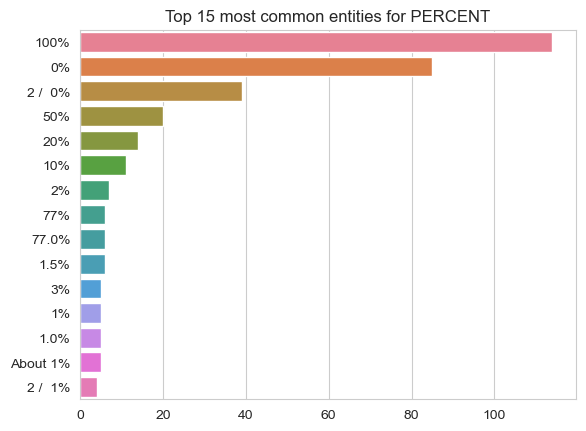

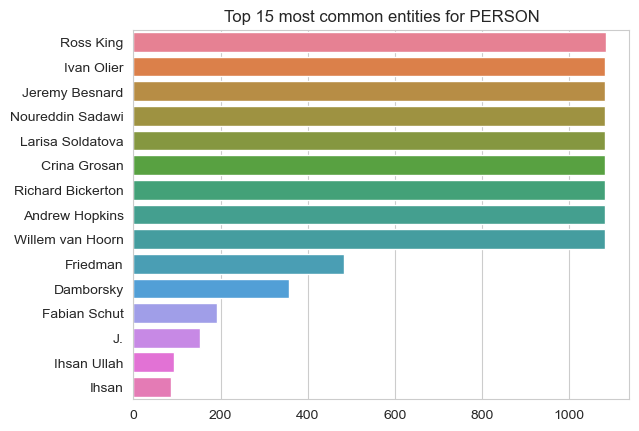

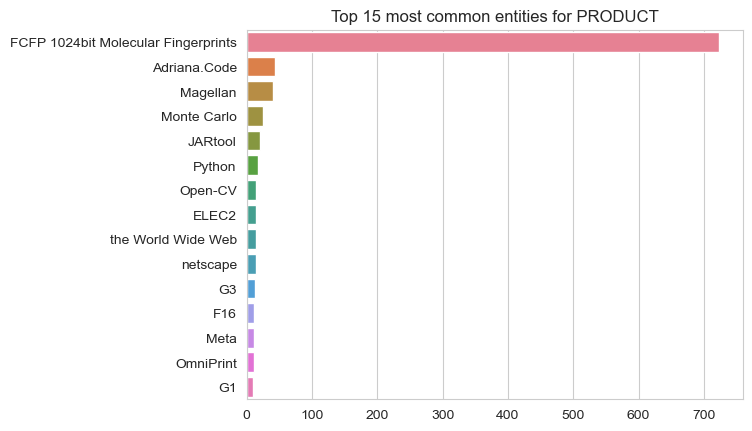

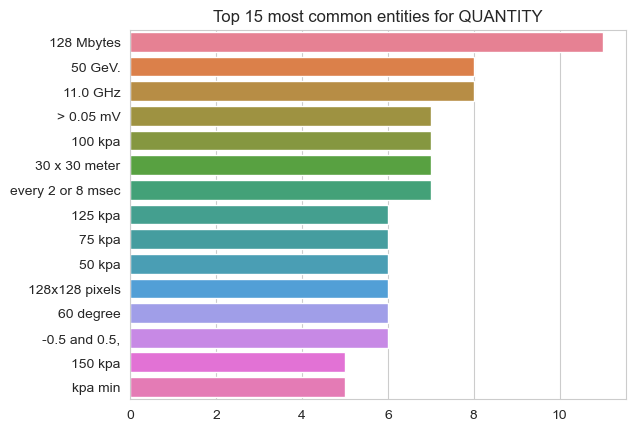

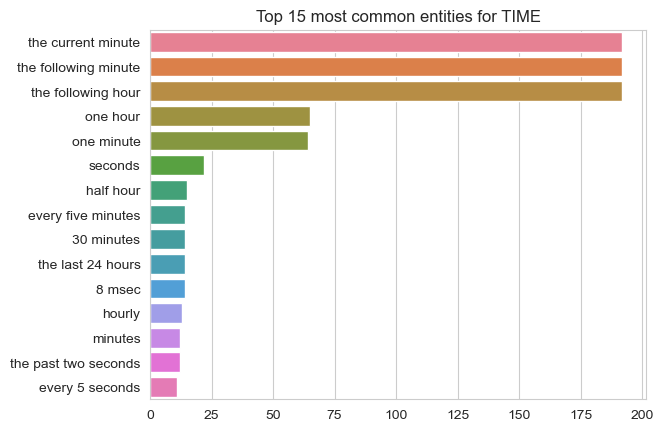

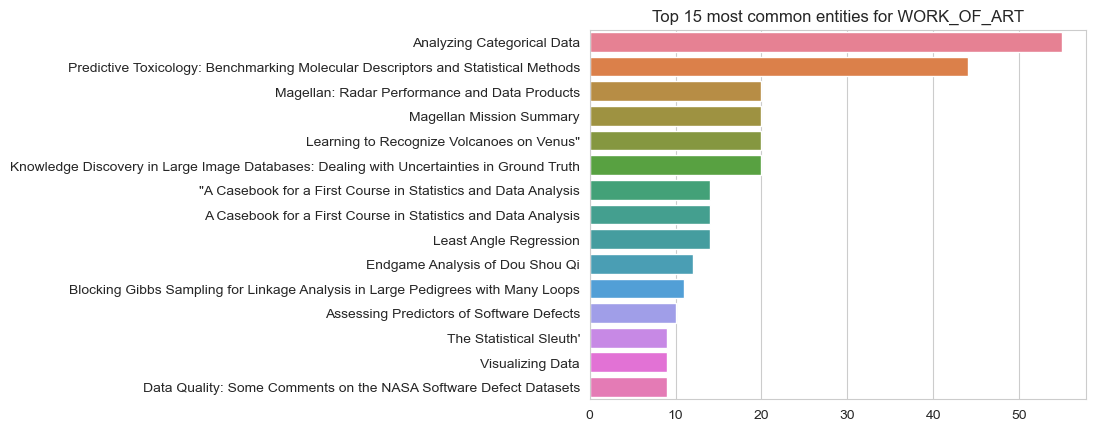

In [37]:
def get_entities(label, most_common=10):
    entities = [X.text for doc in docs for X in doc.ents if X.label_ == label]
    entities = Counter(entities).most_common(most_common)
    return entities


def plot_entities(label, k=15):
    plt.title(f'Top {k} most common entities for {label}')
    sns.barplot(x=[x[1] for x in get_entities(label, k)], y=[x[0] for x in get_entities(label, k)],
                hue=[x[0] for x in get_entities(label, k)])
    plt.show()


for entity in entity_labels:
    plot_entities(entity)

# Part of Speech (POS) tagging with spaCy

In [38]:
# same visualization with displacy but for POS
doc = nlp(df['description'][500][:400])

options = {'distance': 75, 'compact': True, 'color': 'black', 'bg': '#f9e79f'}
# visualize the entities
displacy.render(doc, style="dep", jupyter=True, options=options)

/Users/ivang/miniconda3/envs/openml-tags/lib/python3.11/site-packages/spacy/displacy/__init__.py:69: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [39]:
for token in nlp('Can you give me the can please'):
    print(token.text, token.pos_, token.tag_, spacy.explain(token.tag_))

# use docs from previous cell for POS tagging
counter = Counter([X.pos_ for doc in docs for X in doc])
count = counter.most_common()
count

Can AUX MD verb, modal auxiliary
you PRON PRP pronoun, personal
give VERB VB verb, base form
me PRON PRP pronoun, personal
the DET DT determiner
can NOUN NN noun, singular or mass
please INTJ UH interjection


[('PUNCT', 329539),
 ('NOUN', 318155),
 ('PROPN', 171471),
 ('SPACE', 116518),
 ('ADP', 90469),
 ('DET', 77359),
 ('X', 73138),
 ('ADJ', 67927),
 ('VERB', 67549),
 ('NUM', 60706),
 ('AUX', 29734),
 ('CCONJ', 23813),
 ('PRON', 17881),
 ('SYM', 14069),
 ('ADV', 12240),
 ('SCONJ', 9274),
 ('PART', 8986),
 ('INTJ', 5141)]

In [40]:
# Reverse the order for Plotly to display it with the largest bar on top
count_reversed = count[::-1]

# Create lists of labels and values from the reversed count
labels, values = zip(*count_reversed)

# Generate explanations for each label in the correct order
explanations = [spacy.explain(label) for label in labels]

fig = px.bar(x=values, y=labels, orientation='h', labels={'x': 'Count', 'y': 'Entity'},
             hover_data={'Entity': labels, 'Count': values, 'Description': explanations})

fig.update_traces(hovertemplate='<b>Entity:</b> %{y}<br><b>Count:</b> %{x}<br><b>Description:</b> %{customdata[2]}')

fig.show()

# Dataset description complexity

90-100: Very easy to read. Easily understood by an average 11-year-old student.
80-90: Easy to read. Conversational English for consumers.
70-80: Fairly easy to read.
60-70: Plain English. Easily understood by 13- to 15-year-old students.
50-60: Fairly difficult to read.
30-50: Difficult to read.
0-30: Very difficult to read. Best understood by university graduates.

/Users/ivang/miniconda3/envs/openml-tags/lib/python3.11/site-packages/textstat/textstat.py:7: DeprecationWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html



<Axes: >

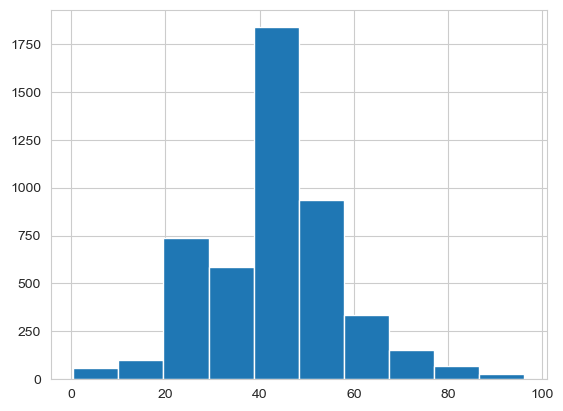

In [41]:
import textstat

# filter the ones with score below 0
stat = df['description'].apply(
    lambda x: textstat.textstat.flesch_reading_ease(x) if 0 < textstat.textstat.flesch_reading_ease(x) <= 100 else None)
stat.hist()

# EDA into tags

In [42]:
print("Datasets without tags vs datasets with tags:", len(df[df['tag'].isnull()]), len(df[df['tag'].notnull()]))

Datasets without tags vs datasets with tags: 127 5317


In [43]:
# Avg number of tags per dataset
df['tag'].map(lambda x: len(x) if x else 0).mean()

4.36921381337252

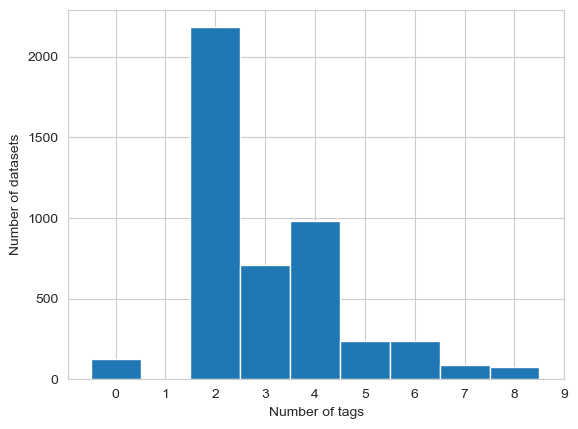

In [44]:
plt.hist(df['tag'].map(lambda x: len(x) if x else 0), bins=np.arange(0, 10) - 0.5)
plt.xlabel('Number of tags')
plt.ylabel('Number of datasets')
plt.xticks(range(10))
plt.show()

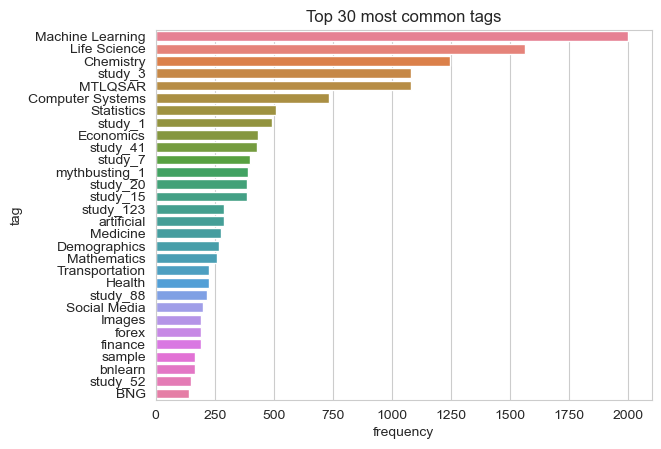

In [45]:
tags = df['tag'].dropna().map(lambda x: x if isinstance(x, list) else [x])
tags = [tag for sublist in tags for tag in sublist]
tag_freq = Counter(tags)
tag_freq = pd.DataFrame(sorted([(count, tag) for tag, count in tag_freq.items()], reverse=True))
tag_freq.columns = ['frequency', 'tag']

k = 30
sns.barplot(x=tag_freq['frequency'][:k], y=tag_freq['tag'][:k], hue=tag_freq['tag'][:k])
plt.title(f'Top {k} most common tags')
plt.show()

# Text similarity

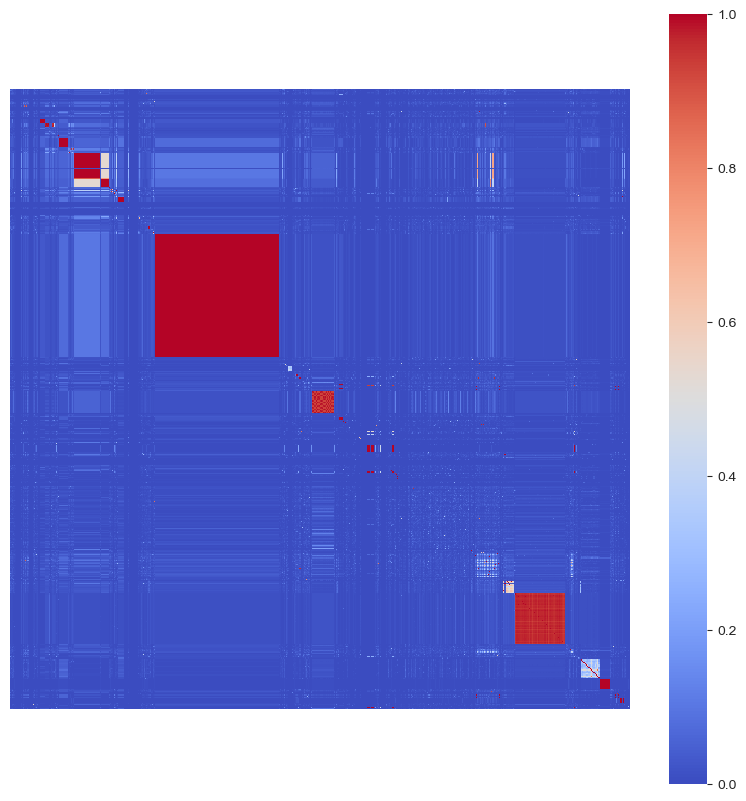

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# remove stopwords and lemmatize
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['description'].map(clean))

cosine_sim = cosine_similarity(X, X)
# plot the similarity matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_sim, cmap='coolwarm', square=True, xticklabels=False, yticklabels=False)
plt.show()

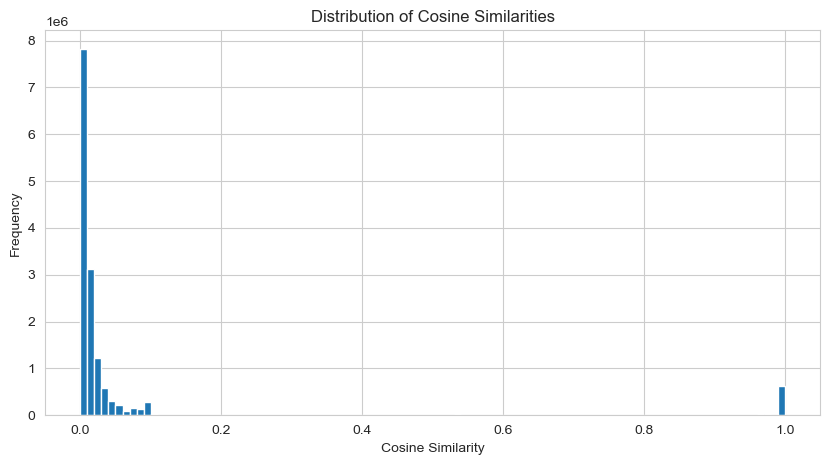

In [47]:
# Flatten the upper triangle of the cosine similarity matrix to get all unique pairs of similarities
# Note: We exclude the diagonal since it represents self-similarity (1.0 for all elements)
upper_tri_idx = np.triu_indices_from(cosine_sim, k=1)
unique_similarities = cosine_sim[upper_tri_idx]

plt.figure(figsize=(10, 5))
plt.hist(unique_similarities, bins=100)

plt.title('Distribution of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.show()

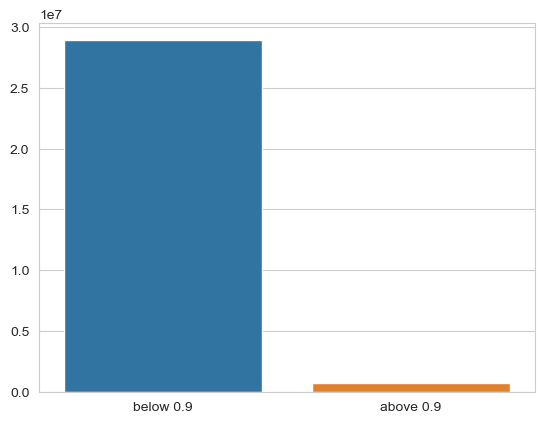

In [48]:
sns.barplot(x=['below 0.9', 'above 0.9'],
            y=[len(np.where(np.triu(cosine_sim, k=1) < 0.9)[0]), len(np.where(np.triu(cosine_sim, k=1) > 0.9)[0])],
            hue=['below 0.9', 'above 0.9'])
plt.show()

In [49]:
above_threshold_indices = np.where(np.triu(cosine_sim, k=1) > 0.9)

# Extract the dataset pairs based on the indices
similar_pairs = [(i, j, cosine_sim[i, j]) for i, j in zip(*above_threshold_indices)]

# Create a new DataFrame to store the similar dataset pairs with their similarity score
similar_df = pd.DataFrame(similar_pairs, columns=['Dataset_ID_1', 'Dataset_ID_2', 'Similarity'])

# Add dataset names, descriptions, openml_url, and version to the DataFrame for easier interpretation
similar_df['Dataset_Name_1'] = similar_df['Dataset_ID_1'].apply(lambda x: df.iloc[x]['name'])
similar_df['Dataset_Description_1'] = similar_df['Dataset_ID_1'].apply(lambda x: df.iloc[x]['description'])
similar_df['OpenML_URL_1'] = similar_df['Dataset_ID_1'].apply(lambda x: df.iloc[x]['openml_url'])
similar_df['Version_1'] = similar_df['Dataset_ID_1'].apply(lambda x: df.iloc[x]['version'])

similar_df['Dataset_Name_2'] = similar_df['Dataset_ID_2'].apply(lambda x: df.iloc[x]['name'])
similar_df['Dataset_Description_2'] = similar_df['Dataset_ID_2'].apply(lambda x: df.iloc[x]['description'])
similar_df['OpenML_URL_2'] = similar_df['Dataset_ID_2'].apply(lambda x: df.iloc[x]['openml_url'])
similar_df['Version_2'] = similar_df['Dataset_ID_2'].apply(lambda x: df.iloc[x]['version'])

similar_df

Dataset_ID_1  Dataset_ID_2  Similarity  \
0                  7           137    0.911782   
1                  7           142    0.906291   
2                 10            12    0.929121   
3                 16          2500    0.977177   
4                 24          4278    0.973543   
...              ...           ...         ...   
750557          5430          5431    0.934729   
750558          5434          5435    1.000000   
750559          5434          5436    1.000000   
750560          5435          5436    1.000000   
750561          5442          5443    1.000000   

                                        Dataset_Name_1  \
0                                                autos   
1                                                autos   
2                                        mfeat-factors   
3                                          mfeat-pixel   
4                                      credit-approval   
...                                                ...   
750557  padding-attack-dataset-netscalergcm-2023-12-13   
750558                                            test   
750559                                            test   
750560                                            test   
750561                                   HousingPrices   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [50]:
# filter dataset_id_1 1287
similar_df[similar_df['Dataset_ID_1'] == 1287]

Dataset_ID_1  Dataset_ID_2  Similarity Dataset_Name_1  \
45870          1287          1288         1.0    QSAR-TID-11   
45871          1287          1289         1.0    QSAR-TID-11   
45872          1287          1290         1.0    QSAR-TID-11   
45873          1287          1291         1.0    QSAR-TID-11   
45874          1287          1292         1.0    QSAR-TID-11   
...             ...           ...         ...            ...   
46936          1287          2354         1.0    QSAR-TID-11   
46937          1287          2355         1.0    QSAR-TID-11   
46938          1287          2356         1.0    QSAR-TID-11   
46939          1287          2357         1.0    QSAR-TID-11   
46940          1287          2358         1.0    QSAR-TID-11   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Dataset_Description_1  \
45870  **Author**: Dr Ivan Olier, Dr Jeremy Besnard, Dr Noureddin Sadawi, Dr Larisa Soldatova, Dr Crina Grosan, Prof Ross King, Dr Richard Bickerton, Prof Andrew Hopkins and Dr Willem van Hoorn  \n**Source**: MetaQSAR project - September 2015  \n**Please cite**:   \n\nThis dataset contains QSAR data (from ChEMBL version 17) showing activity values (unit is pseudo-pCI50) of several compounds on drug target TID: 11, and it has 5742 rows and 1026 features (including IDs and class feature: MOLECULE_CHEMBL_ID and MEDIAN_PXC50). The features represent FCFP 1024bit Molecular Fingerprints which were generated from SMILES strings. They were obtained using the Pipeline Pilot program, Dassault Systèmes BIOVIA. Generating Fingerprints does not usually require missing value imputation as all bits are generated.   
45871  **Author**: Dr Ivan Olier, Dr Jeremy Besnard, Dr Noureddin Sadawi, Dr Larisa Soldatova, Dr Crina Grosan, Prof Ross King, Dr Richard Bickerton, Prof Andrew Hopkins and Dr Willem van Hoorn  \n**Source**: MetaQSAR project - September 2015  \n**Please cite**:   \n\nThis dataset contains QSAR data (from ChEMBL version 17) showing activity values (unit is pseudo-pCI50) of several compounds on drug target TID: 11, and it has 5742 rows and 1026 features (including IDs and class feature: MOLECULE_CHEMBL_ID and MEDIAN_PXC50). The features represent FCFP 1024bit Molecular Fingerprints which were generated from SMILES strings. They were obtained using the Pipeline Pilot program, Dassault Systèmes BIOVIA. Generating Fingerprints does not usually require missing value imputation as all bits are generated.   
45872  **Author**: Dr Ivan Olier, Dr Jeremy Besnard, Dr Noureddin Sadawi, Dr Larisa Soldatova, Dr Crina Grosan, Prof Ross King, Dr Richard Bickerton, Prof Andrew Hopkins and Dr Willem van Hoorn  \n**Source**: MetaQSAR project - September 2015  \n**Please cite**:   \n\nThis dataset contains QSAR data (from ChEMBL version 17) showing activity values (unit is pseudo-pCI50) of several compounds on drug target TID: 11, and it has 5742 rows and 1026 features (including IDs and class feature: MOLECULE_CHEMBL_ID and MEDIAN_PXC50). The features represent FCFP 1024bit Molecular Fingerprints which were generated from SMILES strings. They were obtained using the Pipeline Pilot program, Dassault Systèmes BIOVIA. Generating Fingerprints does not usually require missing value imputation as all bits are 

## Similarity check between versions of dataset descriptions

In [51]:
# Filter the similar_df for entries with the same name and different version (as before)
same_name_different_version = similar_df[
    (similar_df['Dataset_Name_1'] == similar_df['Dataset_Name_2']) &
    (similar_df['Version_1'] != similar_df['Version_2'])
    ]

# Filter the similar_df for entries that are not the same dataset (the complement)
not_same_dataset = similar_df[
    (similar_df['Dataset_Name_1'] != similar_df['Dataset_Name_2'])
]

In [52]:
same_name_different_version

Dataset_ID_1  Dataset_ID_2  Similarity Dataset_Name_1  \
3                 16          2500    0.977177    mfeat-pixel   
5                 26          4231    1.000000       credit-g   
8                 30          2504    0.919559        segment   
18                98          4081    0.991383    electricity   
19                98          4086    0.991665    electricity   
...              ...           ...         ...            ...   
750554          5418          5436    1.000000           test   
750558          5434          5435    1.000000           test   
750559          5434          5436    1.000000           test   
750560          5435          5436    1.000000           test   
750561          5442          5443    1.000000  HousingPrices   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Dataset_Description_1  \
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              **Author**: Robert P.W. Duin, Department of Applied Physics, Delft University of Technology  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Multiple+Features) - 1998  \n**Please cite**: [UCI](h

In [53]:
not_same_dataset

Dataset_ID_1  Dataset_ID_2  Similarity  \
0                  7           137    0.911782   
1                  7           142    0.906291   
2                 10            12    0.929121   
4                 24          4278    0.973543   
6                 26          4232    1.000000   
...              ...           ...         ...   
750546          5401          5403    1.000000   
750547          5402          5403    1.000000   
750555          5429          5430    0.934729   
750556          5429          5431    0.934729   
750557          5430          5431    0.934729   

                                           Dataset_Name_1  \
0                                                   autos   
1                                                   autos   
2                                           mfeat-factors   
4                                         credit-approval   
6                                                credit-g   
...                                                   ...   
750546           3D_Estimation_using_RSSI_of_WLAN_dataset   
750547  3D_Estimation_using_RSSI_of_WLAN_dataset_complete   
750555         padding-attack-dataset-facebook-2023-12-05   
750556         padding-attack-dataset-facebook-2023-12-05   
750557     padding-attack-dataset-netscalergcm-2023-12-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [54]:
from collections import defaultdict

name_to_indices = defaultdict(list)
for i, row in df.iterrows():
    name_to_indices[row['name']].append(i)

# Next, we will iterate over the dictionary and compute similarities between all versions of each dataset.
version_similarity = []

for name, indices in name_to_indices.items():
    # Only consider names with more than one version
    if len(indices) > 1:
        for i in range(len(indices)):
            for j in range(i + 1, len(indices)):
                idx1, idx2 = indices[i], indices[j]
                similarity = cosine_sim[idx1, idx2]
                version_similarity.append({
                    'Dataset_Name': name,
                    'Version_1': df.iloc[idx1]['version'],
                    'OpenML_URL_1': df.iloc[idx1]['openml_url'],
                    'Version_2': df.iloc[idx2]['version'],
                    'OpenML_URL_2': df.iloc[idx2]['openml_url'],
                    'Similarity': similarity
                })

version_similarity_df = pd.DataFrame(version_similarity)

version_similarity_sorted = version_similarity_df.sort_values(by=['Dataset_Name', 'Similarity'],
                                                              ascending=[True, False])

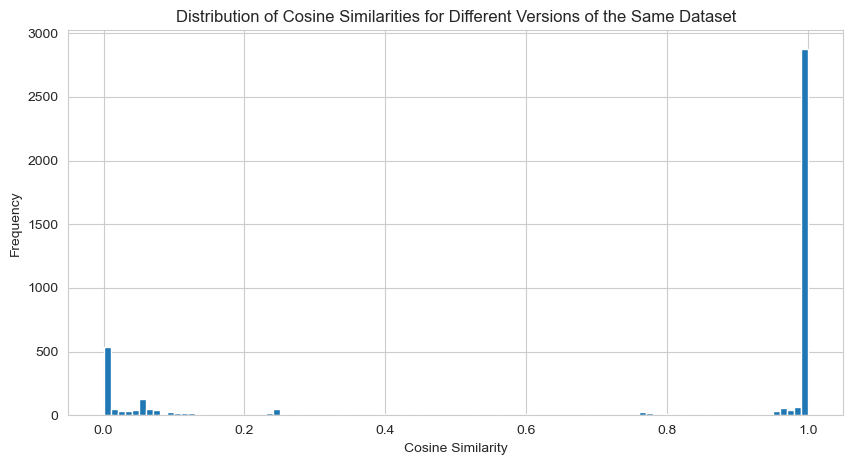

In [55]:
plt.figure(figsize=(10, 5))
plt.hist(version_similarity_sorted['Similarity'], bins=100)

plt.title('Distribution of Cosine Similarities for Different Versions of the Same Dataset')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.show()

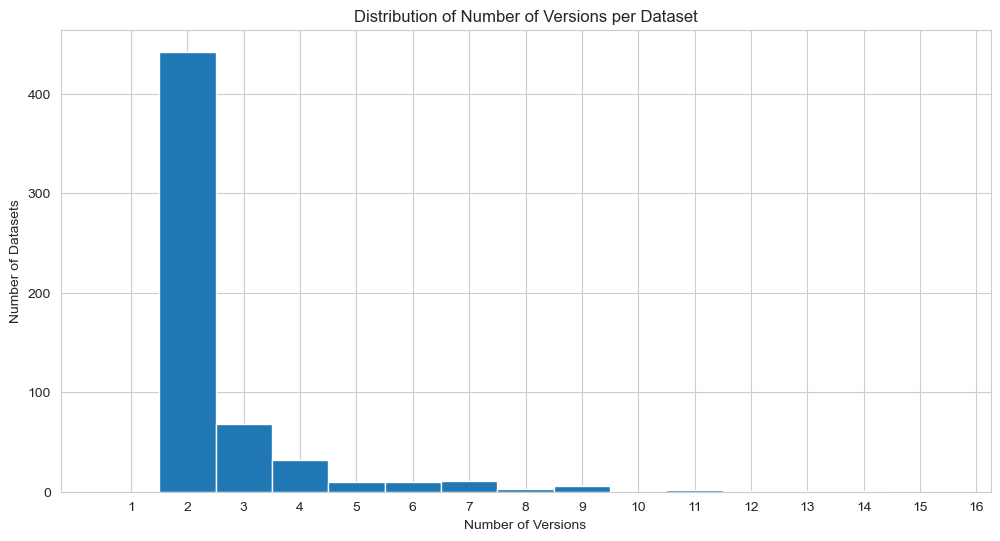

In [56]:
# Group by the 'name' column and count the number of versions for each dataset
version_counts = df.groupby('name').size()

# We're interested in datasets that have more than one version
multiple_versions = version_counts[version_counts > 1]

num_bins = min(multiple_versions.nunique(), 50)

plt.figure(figsize=(12, 6))
plt.hist(multiple_versions, bins=np.arange(1, num_bins + 1) - 0.5)

plt.title('Distribution of Number of Versions per Dataset')
plt.xlabel('Number of Versions')
plt.ylabel('Number of Datasets')

plt.xticks(range(1, num_bins + 1))
plt.show()

# EDA features

In [57]:
len(df._features[0])

39

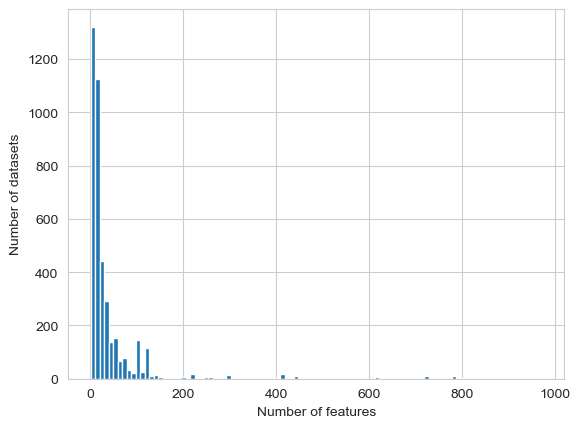

In [59]:
# add num of features column
df['num_features'] = df._features.map(len)

# filter out rows that have more than 1000 features
df[df['num_features'] < 1000]

# plot the distribution of feature numbers that datasets have, ignore ones with > 1000 features
plt.hist(df[df['num_features'] < 1000].num_features, bins=100, color='C0')
plt.xlabel('Number of features')
plt.ylabel('Number of datasets')
plt.show()

In [60]:
df[df['num_features'] > 1000].num_features.min()

1001

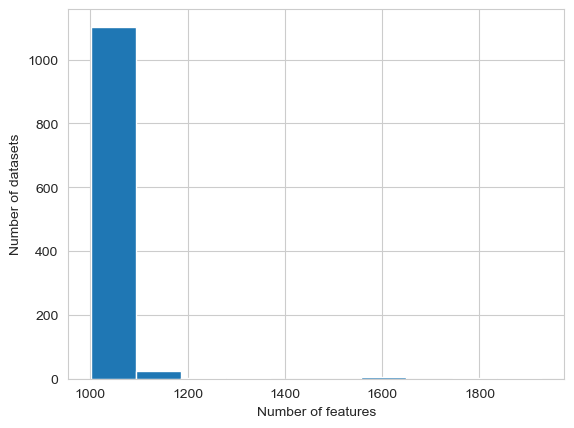

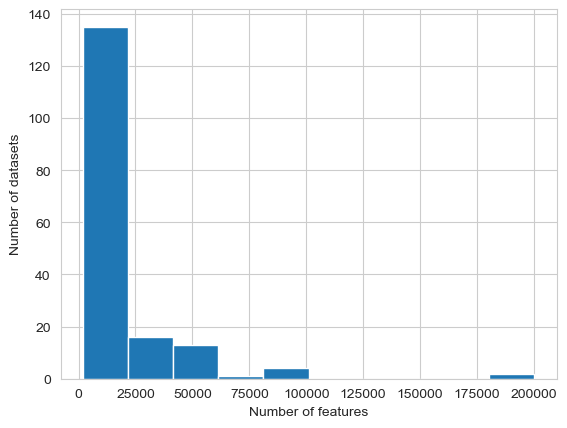

In [61]:
plt.hist(df[(df['num_features'] > 1000) & (df['num_features'] < 2000)].num_features, bins=10, color='C0') 
plt.xlabel('Number of features')
plt.ylabel('Number of datasets')
plt.show()

plt.hist(df[(df['num_features'] > 2000)].num_features, bins=10, color='C0') 
plt.xlabel('Number of features')
plt.ylabel('Number of datasets')
plt.show()

In [62]:
# {0: [0 - family (nominal)],
#  1: [1 - product-type (nominal)],
#  2: [2 - steel (nominal)],
#  3: [3 - carbon (numeric)],
#  4: [4 - hardness (numeric)],
#  5: [5 - temper_rolling (nominal)],
#  6: [6 - condition (nominal)],
#  7: [7 - formability (nominal)],
#  8: [8 - strength (numeric)],
#  9: [9 - non-ageing (nominal)],
#  10: [10 - surface-finish (nominal)],
#  11: [11 - surface-quality (nominal)],
#  12: [12 - enamelability (nominal)],
#  13: [13 - bc (nominal)]}
# df._features[0][0].name gives the name of the feature
# df._features[0][0].data_type gives the data type of the feature
# plot the distribution of feature numbers that datasets have, this is what they look like (above, it's an object, not a string! handle that) for one row, iterate over all rows

features_df = pd.DataFrame(df._features)
features_df = features_df.explode('_features')
features_df = features_df._features.apply(pd.Series)
features_df = features_df.rename(columns={0: 'name', 1: 'data_type'})
features_df

name
0        0
0        1
0        2
0        3
0        4
...    ...
5443     3
5443     4
5443     5
5443     6
5443     7

[4429835 rows x 1 columns]

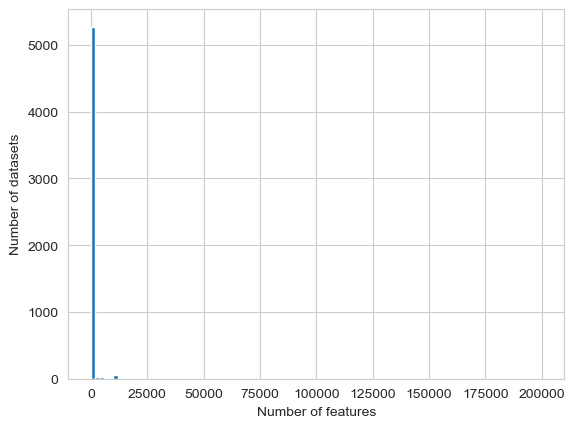

In [63]:
# plot the distribution of feature numbers that datasets have
plt.hist(df._features.map(len), bins=100, color='C0')
plt.xlabel('Number of features')
plt.ylabel('Number of datasets')
plt.show()

In [64]:
features_df.head(50)

name
0     0
0     1
0     2
0     3
0     4
0     5
0     6
0     7
0     8
0     9
0    10
0    11
0    12
0    13
0    14
0    15
0    16
0    17
0    18
0    19
0    20
0    21
0    22
0    23
0    24
0    25
0    26
0    27
0    28
0    29
0    30
0    31
0    32
0    33
0    34
0    35
0    36
0    37
0    38
1     0
1     1
1     2
1     3
1     4
1     5
1     6
1     7
1     8
1     9
1    10

In [65]:
# Perform EDA on the features DataFrame

# Count the number of each type of feature
# feature_type_counts = features_df['Type'].value_counts()
# 
# # Plot the distribution of feature types
# plt.figure(figsize=(8, 4))
# sns.barplot(x=feature_type_counts.index, y=feature_type_counts.values)
# plt.title('Distribution of Feature Types')
# plt.xlabel('Feature Type')
# plt.ylabel('Count')
# plt.show()
# 
# # If you need more detailed analysis, such as the number of unique values for nominal features
# # or descriptive statistics for numeric features, you would need access to the actual data for each feature
# # For demonstration purposes, here's how you might calculate the number of unique values for nominal features
# 
# # Assuming 'data' is a DataFrame containing the actual dataset
# # nominal_features = features_df[features_df['Type'] == 'nominal']['Feature']
# # unique_value_counts = {feature: data[feature].nunique() for feature in nominal_features}
# # print(unique_value_counts)

In [66]:
# Load spaCy's language model
nlp = spacy.load("en_core_web_trf")

# Assuming 'df' is your DataFrame and it contains a column 'tag' with the tags

# Combine all tags into one list and then into a text string for processing
tags = df['tag'].dropna().tolist()
tags_combined = ' '.join([' '.join(tag_list) for tag_list in tags if isinstance(tag_list, list)])

# Process the combined text with spaCy
doc_tags = nlp(tags_combined)

# POS Tagging
pos_counts = Counter([token.pos_ for token in doc_tags])
# reverse the order for Plotly to display it with the largest bar on top
# pos_counts = dict(sorted(pos_counts.items(), key=lambda item: item[1], reverse=True))
# NER
ner_counts = Counter([ent.label_ for ent in doc_tags.ents])
# reverse the order for Plotly to display it with the largest bar on top
# ner_counts = dict(sorted(ner_counts.items(), key=lambda item: item[1], reverse=True))

# Convert the counts to DataFrames for easy plotting
df_pos_counts = pd.DataFrame(pos_counts.items(), columns=['POS', 'Frequency']).sort_values(by='Frequency',
                                                                                           ascending=True)
df_ner_counts = pd.DataFrame(ner_counts.items(), columns=['Entity', 'Frequency']).sort_values(by='Frequency',
                                                                                              ascending=True)

# Plotting POS tags using Plotly
fig_pos = px.bar(df_pos_counts, x='Frequency', y='POS', orientation='h', title='Frequency of POS Tags in Dataset Tags')
fig_pos.update_layout(xaxis_title='Frequency', yaxis_title='POS')
fig_pos.show()

# Plotting NER tags using Plotly
fig_ner = px.bar(df_ner_counts, x='Frequency', y='Entity', orientation='h',
                 title='Frequency of Named Entities in Dataset Tags')
fig_ner.update_layout(xaxis_title='Frequency', yaxis_title='Entity')
fig_ner.show()